In [30]:
# using the PolyChaos.jl package to calculate the numerical integral
using PolyChaos

opq = Uniform01OrthoPoly(3, addQuadrature = true) # can show you how is the function integrated
integrate(x -> 6x^5, opq) # show the result of the integral
show(opq)


Univariate orthogonal polynomials
degree:		3
#coeffs:	4
α =		[0.5, 0.5, 0.5, 0.5]
β =		[1.0, 0.08333333333333333, 0.06666666666666667, 0.06428571428571428]

Measure dλ(t)=w(t)dt
w:	w_uniform01
dom:	(0.0, 1.0)
symmetric:	true


In [31]:
# Numerical integration
n = 3
f(t) = sin(t) # define a function
op = Uniform01OrthoPoly(n, addQuadrature = true) # create a polynomial basis with uniform distribution
variant0 = integrate(f, op) # integrate the function

0.45969793013168375

In [32]:
measure = Uniform01Measure() # create a normalized measure
quadRule1 = Quad(n-1, measure) # create a quadrature rule
# use the n order orthogonal polynomial to calculate the integral
# with the given measure
nw(quadRule1)
# The function nw() prints the nodes and weights.
variant1 = integrate(f, quadRule1)

┌ Warning: For measures of type Uniform01Measure the quadrature rule should be based on the recurrence coefficients.
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/typesQuad.jl:63


0.4598621898707848

In [33]:
# print the parmeters of polynomials
op = Uniform01OrthoPoly(n, addQuadrature=false)
coeffs(op)

quadRule2 = Quad(n, op)

Quad{Float64, Vector{Float64}}("golubwelsch", 3, [0.11270166537925838, 0.49999999999999994, 0.8872983346207417], [0.2777777777777777, 0.4444444444444444, 0.27777777777777757])

# Quadrature Rules
1. choose the nodes to approximate the integral
2. Generate recurrence coefficients ($\alpha$, $\beta$).
3. Generate quadrature rule from those recurrence coefficients.

In [34]:
using PolyChaos, LinearAlgebra
my_f(t) = t^2
a, b = 1.23, 3.45
int_exact = 0.353897

N = 4
α, β = rm_jacobi(N+1, a, b)
# rm_jacobi() generates the Jacobi polynomial
display([α, β])

2-element Vector{Vector{Float64}}:
 [0.33233532934131743, 0.1791854079858716, 0.1120747682907886, 0.0767199517952717, 0.055815332777486494]
 [1.5640214854839802, 0.11582724334265602, 0.1679536499742999, 0.19497630805780736, 0.210634847295037]

## Univariate Monic Orthogonal Polynomials

To generate the orthogonal polynomials up to maximum degree deg, simply call

In [35]:
deg = 4
op = GaussOrthoPoly(deg)
show(op)


Univariate orthogonal polynomials
degree:		4
#coeffs:	5
α =		[0.0, 0.0, 0.0, 0.0, 0.0]
β =		[1.0, 1.0, 2.0, 3.0, 4.0]

Measure dλ(t)=w(t)dt
w:	w_gaussian
dom:	(-Inf, Inf)
symmetric:	true


In [36]:
coeffs(op) # whne the function is not provided, the coeffs() function will return the α and β of the polynomial

5×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  2.0
 0.0  3.0
 0.0  4.0

In [37]:
@doc coeffs

```
coeffs(op::AbstractOrthoPoly)
coeffs(op::AbstractVector)
coeffs(mop::MultiOrthoPoly)
```

returns recurrence coefficients of in matrix form


In [38]:
supp = (-1, 1) # tuple
w(t) = 1 + t
my_meas = Measure("my_meas", w, supp, false, Dict())
my_op = OrthoPoly("my_op", deg, my_meas; Nquad = 200)
show(my_op)


Univariate orthogonal polynomials
degree:		4
#coeffs:	5
α =		[0.3333333333333334, 0.06666666666666654, 0.028571428571428723, 0.015873015873015817, 0.010101010101010137]
β =		[2.0000000000000004, 0.22222222222222224, 0.24, 0.2448979591836734, 0.2469135802469136]

Measure dλ(t)=w(t)dt
name:	my_meas
w:	w
dom:	(-1.0, 1.0)
symmetric:	false
pars:	Dict{Any, Any}()


## Multivariate Monic Orthogonal Polynomials

In [39]:
deg = [3, 5, 6, 4]
d = minimum(deg)
op1 = GaussOrthoPoly(deg[1]);
op2 = Uniform01OrthoPoly(deg[2]);
op3 = Beta01OrthoPoly(deg[3], 2, 1.2);
ops = [op1, op2, op3, my_op];
mop = MultiOrthoPoly(ops, d);
show(mop)


4-variate orthogonal polynomials
name:		GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}
		Uniform01OrthoPoly{Vector{Float64}, Uniform01Measure, Quad{Float64, Vector{Float64}}}
		Beta01OrthoPoly{Vector{Float64}, Beta01Measure, Quad{Float64, Vector{Float64}}}
		my_op
deg:		3
dim:		35
ind:		[0, 0, 0, 0]
		[1, 0, 0, 0]
		[0, 1, 0, 0]
		[0, 0, 1, 0]
		[0, 0, 0, 1]
		[2, 0, 0, 0]
		[1, 1, 0, 0]
		...



false

## Gaussian Mixture models

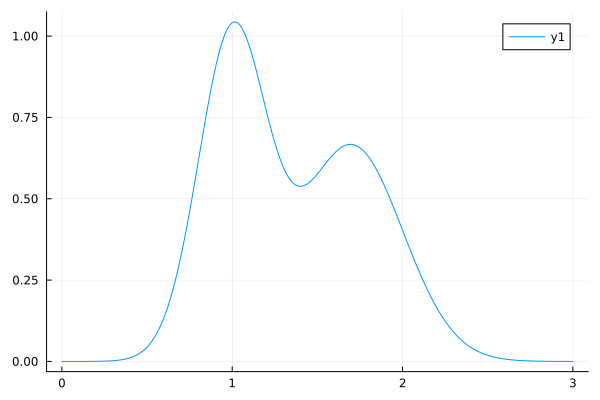

In [40]:
using Plots
f(x, μ, σ) = 1 / sqrt(2*π*σ^2) * exp(-((x - μ)^2) / (2*σ^2))
μs, σs, ws = [1.0, 1.7], [0.2, 0.3], [0.5, 0.5] # support
ρ(x) = sum(w*f(x, μ, σ) for (μ, σ, w) in zip(μs, σs, ws))
x = 0:0.01:3
plot(x, ρ.(x))

In [41]:
using PolyChaos
deg = 4
meas = Measure("my_GaussMixture", ρ, (-Inf,Inf), false, Dict(:μ=>μs, :σ=>σs)) # build measure
op = OrthoPoly("my_op", deg, meas; Nquad = 100, Nrec = 2*deg) # construct orthogonal polynomial
showbasis(op, digits=2) # in case you wondered

1
x - 1.35
x^2 - 2.84x + 1.82
x^3 - 4.36x^2 + 5.94x - 2.5
x^4 - 5.91x^3 + 12.35x^2 - 10.74x + 3.26


In [42]:
T2 = Tensor(2,op)
[ T2.get([i,j]) for i in 0:deg, j in 0:deg ]

5×5 Matrix{Float64}:
 1.0  0.0     0.0     0.0        0.0
 0.0  0.1875  0.0     0.0        0.0
 0.0  0.0     0.0385  0.0        0.0
 0.0  0.0     0.0     0.0128086  0.0
 0.0  0.0     0.0     0.0        0.00485189

In [43]:
print(T2)

Tensor{OrthoPoly{Vector{Float64}, Measure, Quad{Float64, Vector{Float64}}}}(2, sparsevec([1, 6, 11, 16, 21], [0.9999999993955137, 0.18749999236155512, 0.038499995413798095, 0.012808641479743572, 0.004851885484736936], 21), PolyChaos.var"#getfun#45"{Int64, OrthoPoly{Vector{Float64}, Measure, Quad{Float64, Vector{Float64}}}, SparseArrays.SparseVector{Float64, Int64}}(2, OrthoPoly{Vector{Float64}, Measure, Quad{Float64, Vector{Float64}}}("my_op", 4, [1.3499999967774095, 1.4899999464575822, 1.5225460601098808, 1.545324924715502, 1.6015858291893494, 1.605445136291393, 1.6542673989362917, 1.6610290610807856], [0.9999999993955137, 0.18749999247489632, 0.20533331723853504, 0.33269202611782794, 0.3787978211748706, 0.47348199067408875, 0.540332246686247, 0.6175910486457173], Measure("my_gaussmixture", Main.ρ, (-Inf, Inf), false, Dict(:μ => [1.0, 1.7], :σ => [0.2, 0.3])), Quad{Float64, Vector{Float64}}("golubwelsch", 7, [0.431260594660331, 0.7524835958689836, 1.0694917023777746, 1.517810268354706

## Multiple Discretization
This tutorial shows how to compute recurrence coefficients for non-trivial weight functions, and how they are being used for quadrature. The method we use is called multiple discretization.


In [44]:
# solve the integral by Féjer's rule
using PolyChaos, LinearAlgebra

γ = 0.5;
int_exact = 1 + π / 2
function my_w(t,γ)
    γ + (1 - γ) / sqrt(1 - t^2)
end
N = 1000
nodes, weights = fejer(N);
int_fejer = dot(weights, my_w.(nodes, γ)) # calculate the inner product
print("Fejer error:\t$(abs(int_exact - int_fejer))\twith $N nodes")

Fejer error:	0.00034489625618583375	with 1000 nodes

In [45]:
function quad_gaussleg(N, γ)
    a, b = rm_legendre(N)
    nodes, weights = golubwelsch(a, b)
end
nodes, weights = quad_gaussleg(N+1, γ)
int_gaussleg = dot(weights, γ .+ (1-γ)/sqrt.(1 .- nodes.^2))
print("Gauss-Legendre error:\t$(abs(int_exact-int_gaussleg))\twith $N nodes")

Gauss-Legendre error:	1.5692263158654431	with 1000 nodes

In [46]:
function quad_gausscheb(N, γ)
    a, b = rm_legendre(N)
    nodes, weights = golubwelsch(a, b)
end
nodes, weights = quad_gausscheb(N+1, γ)
int_gausscheb = dot(weights, γ .+ (1 - γ)*sqrt.(1 .- nodes.^2))
# int = sum(xw(:,2).*(1 + sqrt(1 - xw(:,1)).^2))
print("Gauss-Chebyshev error:\t$(abs(int_exact - int_gausscheb))\twith $N nodes")

Gauss-Chebyshev error:	0.7853981629862432	with 1000 nodes

In [47]:
function quad_gausscheb(N, γ)
    a, b = rm_legendre(N)
    nodes, weights = golubwelsch(a, b)
end
nodes, weights = quad_gausscheb(N+1, γ)
int_gausscheb = dot(weights, γ .+ (1 - γ)*sqrt.(1 .- nodes.^2))
# int = sum(xw(:,2).*(1 + sqrt(1 - xw(:,1)).^2))
print("Gauss-Chebyshev error:\t$(abs(int_exact - int_gausscheb))\twith $N nodes")

Gauss-Chebyshev error:	0.7853981629862432	with 1000 nodes

$$\begin{align*} w_1(t) &= \gamma \\ w_2(t) &= (1-\gamma) \frac{1}{\sqrt{1-t^2}}. \end{align*}$$

## Computation of Scalar Products
By now, we are able to construct orthogonal polynomials, and to construct quadrature rules for a given nonnegative weight function, respectively. Now we combine both ideas to solve integrals involving the orthogonal polynomials

In [48]:
deg, n = 4, 20
s_α, s_β = 2.1, 3.2
opq = Beta01OrthoPoly(deg, s_α, s_β; Nrec=n, addQuadrature=true)

Beta01OrthoPoly{Vector{Float64}, Beta01Measure, Quad{Float64, Vector{Float64}}}(4, [0.39622641509433965, 0.45308865339881105, 0.4732655766681396, 0.482729089351984, 0.4879233481934926, 0.49108064278342917, 0.49314292190864784, 0.4945640779897571, 0.4955849084142159, 0.4963428640512603, 0.49692106736331404, 0.4973721930243669, 0.49773093800397555, 0.4980209139779084, 0.4982586420286101, 0.4984559630451982, 0.4986215434156863, 0.4987618443402984, 0.4988817625639983, 0.4989850639437675], [1.0, 0.03797318144060756, 0.049528193464418745, 0.054496397032519545, 0.05707494398498378, 0.05858224318366976, 0.05953877522858778, 0.06018346810103027, 0.0606384719605267, 0.06097150420824787, 0.061222558056958205, 0.06141648535528466, 0.061569388295544744, 0.061692071403646374, 0.06179200321800959, 0.061874480034347076, 0.06194334217794196, 0.06200142915302492, 0.06205087705273863, 0.062093317746215744], Beta01Measure(PolyChaos.var"#102#103"{Float64, Float64}(2.1, 3.2), (0.0, 1.0), false, 2.1, 3.2), Q

In [49]:
normsq = computeSP2(opq)

5-element Vector{Float64}:
 1.0
 0.03797318144060756
 0.0018807430768498865
 0.00010249372143217383
 5.849823409553853e-6

In [50]:
Tensor(2, opq)
[ T2.get([i,j]) for i in 0:deg, j in 0:deg ]^2


5×5 Matrix{Float64}:
 1.0  0.0        0.0         0.0          0.0
 0.0  0.0351562  0.0         0.0          0.0
 0.0  0.0        0.00148225  0.0          0.0
 0.0  0.0        0.0         0.000164061  0.0
 0.0  0.0        0.0         0.0          2.35408e-5

### Arbitrary weights

In [51]:
using SpecialFunctions
supp = (0, 1)
w(t) = (t^(s_α-1)*(1-t)^(s_β-1) / SpecialFunctions.beta(s_α, s_β))
my_meas = Measure("my_meas", w, supp, false)
my_opq = OrthoPoly("my_opq", deg, my_meas; Nrec = n, addQuadrature = true)

OrthoPoly{Vector{Float64}, Measure, Quad{Float64, Vector{Float64}}}("my_opq", 4, [0.39622641509448137, 0.45308865339922233, 0.47326557666900376, 0.4827290893535495, 0.48792334819610156, 0.4910806427875325, 0.4931429219148365, 0.49456407799878127, 0.49558490842701963, 0.4963428640690026, 0.4969210673874065, 0.4973721930564988, 0.49773093804615276, 0.4980209140324842, 0.49825864209832416, 0.49845596313321433, 0.4986215435256327, 0.49876184447631033, 0.49888176273076446, 0.4989850641465723], [0.9999999999996537, 0.037973181440564815, 0.049528193464296905, 0.05449639703227424, 0.05707494398455888, 0.05858224318299423, 0.05953877522757283, 0.06018346809956607, 0.060638471958479156, 0.06097150420545557, 0.0612225580532287, 0.061416485350391216, 0.06156938828922262, 0.061692071395589285, 0.0617920032078656, 0.061874480021715215, 0.06194334216236784, 0.06200142913399661, 0.06205087702968264, 0.06209331771849251], Measure("my_meas", Main.w, (0.0, 1.0), false, Dict{Any, Any}()), Quad{Float64, Ve

In [52]:
my_normsq = computeSP2(my_opq)

5-element Vector{Float64}:
 0.9999999999996537
 0.037973181440551666
 0.0018807430768424916
 0.00010249372143130949
 5.849823409460971e-6

In [53]:
m = 3
my_t = Tensor(m, my_opq)
my_T = [ my_t.get([i1,i2,i3]) for i1=0:dim(opq)-1,i2=0:dim(opq)-1,i3=0:dim(opq)-1]

5×5×5 Array{Float64, 3}:
[:, :, 1] =
 1.0  0.0        0.0         0.0          0.0
 0.0  0.0379732  0.0         0.0          0.0
 0.0  0.0        0.00188074  0.0          0.0
 0.0  0.0        0.0         0.000102494  0.0
 0.0  0.0        0.0         0.0          5.84982e-6

[:, :, 2] =
 0.0        0.0379732   0.0          0.0          0.0
 0.0379732  0.00215924  0.00188074   0.0          0.0
 0.0        0.00188074  0.000144891  0.000102494  0.0
 0.0        0.0         0.000102494  8.86598e-6   5.84982e-6
 0.0        0.0         0.0          5.84982e-6   5.36411e-7

[:, :, 3] =
 0.0         0.0          0.00188074   0.0          0.0
 0.0         0.00188074   0.000144891  0.000102494  0.0
 0.00188074  0.000144891  0.000127149  1.0934e-5    5.84982e-6
 0.0         0.000102494  1.0934e-5    7.80614e-6   7.09802e-7
 0.0         0.0          5.84982e-6   7.09802e-7   4.73123e-7

[:, :, 4] =
 0.0          0.0          0.0          0.000102494  0.0
 0.0          0.0          0.000102494  8.865

In [55]:
mop = MultiOrthoPoly([opq, my_opq], deg)
mt2 = Tensor(2,mop)
mt3 = Tensor(3,mop)
mT2 = [ mt2.get([i,i]) for i=0:dim(mop)-1 ]

15-element Vector{Float64}:
 0.9999999999996537
 0.03797318144059441
 0.037973181440551666
 0.0018807430768492354
 0.00144196250871918
 0.0018807430768424916
 0.00010249372143213834
 7.141779810028215e-5
 7.141779810010645e-5
 0.00010249372143130949
 5.8498234095518276e-6
 3.892012680461295e-6
 3.5371945211048704e-6
 3.892012680434203e-6
 5.849823409460971e-6

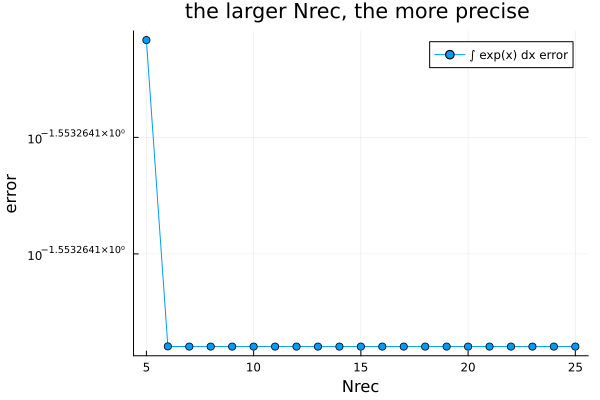

In [59]:
using PolyChaos, Plots

f(x) = exp(x)
exact = exp(1) - 1

s_α, s_β = 2.0, 2.0
deg = 4

Nrecs = 5:1:25
errors = Float64[]

for Nrec in Nrecs
    opq = Beta01OrthoPoly(deg, s_α, s_β; Nrec=Nrec, addQuadrature=true)
    x_nodes = opq.quad.nodes
    w_weights = opq.quad.weights
    approx = sum(f.(x_nodes) .* w_weights)
    push!(errors, abs(approx - exact))
end

plot(Nrecs, errors, yscale=:log10, marker=:circle, xlabel="Nrec", ylabel="error",
     label="∫ exp(x) dx error", title="the larger Nrec, the more precise ", legend=:topright)

# Polynomial Chaos

In [60]:
using PolyChaos

In [66]:
d = 6
myops = Dict()
# d = Dict("a" => 1, "b" => 2)
polynames = ["gaussian", "beta01", "uniform01", "logistic"]

# gaussian
gaussian = GaussOrthoPoly(d);
myops["gaussian"] = gaussian

# beta01
α, β = 1.3, 2.2
beta01 = Beta01OrthoPoly(d,α,β);
myops["beta01"] = beta01

# uniform01
uniform01 = Uniform01OrthoPoly(d);
myops["uniform01"] = uniform01

# logistic
logistic = LogisticOrthoPoly(d);
myops["logistic"] = logistic
myops

Dict{Any, Any} with 4 entries:
  "uniform01" => Uniform01OrthoPoly{Vector{Float64}, Uniform01Measure, Quad{Flo…
  "logistic"  => LogisticOrthoPoly{Vector{Float64}, LogisticMeasure, Quad{Float…
  "beta01"    => Beta01OrthoPoly{Vector{Float64}, Beta01Measure, Quad{Float64, …
  "gaussian"  => GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Ve…

In [68]:
points, degress = randn(10), 0:2:d
[evaluate(degree, points, gaussian) for degree in degress ]

4-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [-0.8123050783180121, -0.5523115334920103, -0.6201172222507616, -0.29063269732012464, 2.773318325659368, -0.9354260020782503, 0.45338819293601795, 3.6177439920788634, -0.9320741952558378, 1.4711855823899835]
 [1.9090598535332803, 0.5142941639963374, 0.865014258335047, -0.7530018459679303, -5.401978767199393, 2.6167258136771, -3.607991918250284, -3.3829043760927417, 2.5970590864851686, -5.720355311727779]
 [-7.07555690228822, 2.2293344915506155, -0.015117638757268459, 9.73045409316563, -5.045396480214158, -12.156447850900722, 21.787456094826805, -28.588174878591232, -12.012234106878822, 19.69291124438056]

In [71]:
results = Dict()

for (name, op) in myops
    results[name] = [evaluate(degree, points, op) for degree in degress]
end

In [75]:
μ, σ = 3., 0.2
pce_gaussian = convert2affinePCE(μ,σ,gaussian)


2-element Vector{Float64}:
 3.0
 0.2

In [76]:
a, b = -0.3, 1.2
convert2affinePCE(a,b,uniform01)

2-element Vector{Float64}:
 0.45
 1.5

In [77]:
mean(pce_gaussian,myops["gaussian"]), std(pce_gaussian,myops["gaussian"])

(3.0, 0.2)

In [ ]:
# Sampling
using Statistics
N = 1000
ξ_gaussian = sampleMeasure(N, myops["gaussian"])
samples_gaussian = evaluatePCE(pce_gaussian, ξ_gaussian, myops["gaussian"])


In [78]:
k = 1
deg, Nrec = 2, 20
opq = GaussOrthoPoly(deg; Nrec=Nrec, addQuadrature=true);

In [79]:
showbasis(opq; sym="ξ")

1
ξ
ξ^2 - 1.0


In [81]:
L = dim(opq)
mu, sig = 0., 1.
x = [ convert2affinePCE(mu, sig, opq); zeros(Float64,L-2) ]

3-element Vector{Float64}:
 0.0
 1.0
 0.0

In [86]:
t2 = Tensor(2, opq);
t3 = Tensor(3, opq)
show(L)

3

In [89]:
show(x)

[0.0, 1.0, 0.0]

In [ ]:
y = [ sum( x[i]*x[j]*t3.get([i-1,j-1,m-1])/t2.get([m-1,m-1])  for i=1:L, j=1:L ) for m=1:L ]

In [88]:
t3.get([0,0,0])

1.0

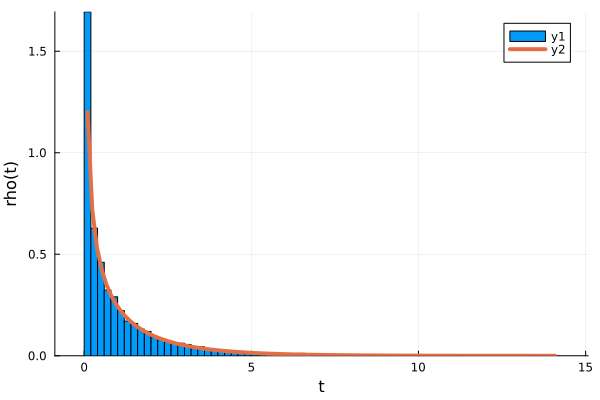

In [87]:
using Plots
Nsmpl = 10000
# long way: ξ = sampleMeasure(Nsmpl,opq), ysmpl = evaluatePCE(y,ξ,opq)
ysmpl = samplePCE(Nsmpl, y, opq)
histogram(ysmpl; normalize=true, xlabel="t", ylabel="rho(t)")

import SpecialFunctions: gamma
ρ(t) = 1/(sqrt(2)*gamma(0.5))*1/sqrt(t)*exp(-0.5*t)
t = range(0.1; stop=maximum(ysmpl), length=100)
plot!(t, ρ.(t), w=4)

In [92]:
using PolyChaos

degree, Nrec = 2, 20
opq = GaussOrthoPoly(degree; Nrec=Nrec, addQuadrature = true);
k = 12
mop = MultiOrthoPoly([opq for i in 1:k], degree)

MultiOrthoPoly{ProductMeasure, Quad{Float64, Vector{Float64}}, Vector{GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}}}(["GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}", "GaussOrthoPoly{Vector{Float64}, GaussM

In [93]:
L = dim(mop)
mu, sig = 0., 1.
x = [ assign2multi(convert2affinePCE(mu, sig, opq), i, mop.ind) for i in 1:k ]

12-element Vector{SparseArrays.SparseVector{Float64, Int64}}:
 sparsevec([2], [1.0], 91)
 sparsevec([3], [1.0], 91)
 sparsevec([4], [1.0], 91)
 sparsevec([5], [1.0], 91)
 sparsevec([6], [1.0], 91)
 sparsevec([7], [1.0], 91)
 sparsevec([8], [1.0], 91)
 sparsevec([9], [1.0], 91)
 sparsevec([10], [1.0], 91)
 sparsevec([11], [1.0], 91)
 sparsevec([12], [1.0], 91)
 sparsevec([13], [1.0], 91)

In [94]:
t2 = Tensor(2,mop)
t3 = Tensor(3,mop)

Tensor{MultiOrthoPoly{ProductMeasure, Quad{Float64, Vector{Float64}}, Vector{GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}}}}(3, sparsevec([1, 92, 183, 274, 365, 456, 547, 638, 729, 820  …  696236, 696327, 696418, 704429, 704520, 712621, 720809, 720900, 729001, 737191], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  8.000000000000021, 2.0000000000000036, 2.0000000000000036, 2.0000000000000036, 1.0, 2.0000000000000036, 8.000000000000021, 2.0000000000000036, 2.0000000000000036, 8.000000000000021], 737191), PolyChaos.var"#getfun#44"{Int64, MultiOrthoPoly{ProductMeasure, Quad{Float64, Vector{Float64}}, Vector{GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}}}, SparseArrays.SparseVector{Float64, Int64}}(3, MultiOrthoPoly{ProductMeasure, Quad{Float64, Vector{Float64}}, Vector{GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Float64}}}}}(["GaussOrthoPoly{Vector{Float64}, GaussMeasure, Quad{Float64, Vector{Fl

In [95]:
y = [ sum( x[i][j1]*x[i][j2]*t3.get([j1-1,j2-1,m-1])/t2.get([m-1,m-1])  for i=1:k, j1=1:L, j2=1:L ) for m=1:L ]

91-element Vector{Float64}:
 12.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  1.0000000000000018
  0.0
  0.0
  1.0000000000000018
  0.0
  1.0000000000000018

In [96]:
moms_analytic(k) = [k, sqrt(2k), sqrt(8/k)]
function myskew(y)
   e3 = sum( y[i]*y[j]*y[k]*t3.get([i-1,j-1,k-1]) for i=1:L,j=1:L,k=1:L )
   μ = y[1]
   σ = std(y,mop)
   (e3-3*μ*σ^2-μ^3)/(σ^3)
end

print("Expected value:\t\t$(moms_analytic(k)[1]) = $(mean(y,mop))\n")
print("\t\t\terror = $(abs(mean(y,mop)-moms_analytic(k)[1]))\n")
print("Standard deviation:\t$(moms_analytic(k)[2]) = $(std(y,mop))\n")
print("\t\t\terror = $(moms_analytic(k)[2]-std(y,mop))\n")
print("Skewness:\t\t$(moms_analytic(k)[3]) = $(myskew(y))\n")
print("\t\t\terror = $(moms_analytic(k)[3]-myskew(y))\n")

Expected value:		12.0 = 12.0
			error = 0.0
Standard deviation:	4.898979485566356 = 4.898979485566365
			error = -8.881784197001252e-15
Skewness:		0.816496580927726 = 0.8164965809276967
			error = 2.930988785010413e-14


┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring keyword method; sampling from Distributions.jl instead
└ @ PolyChaos /Users/zs5766/.julia/packages/PolyChaos/zO2p7/src/polynomial_chaos.jl:226
┌ Warning: ignoring ke

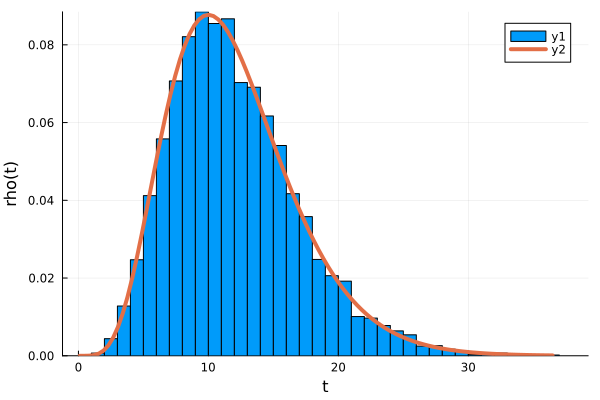

In [100]:
using Plots
Nsmpl = 10000
# long way: ξ = sampleMeasure(Nsmpl,mop), ysmpl = evaluatePCE(y,ξ,mop)
ysmpl = samplePCE(Nsmpl, y, mop)
histogram(ysmpl;normalize=true, xlabel="t",ylabel="rho(t)")

import SpecialFunctions: gamma
ρ(t) = 1/(2^(0.5*k)*gamma(0.5*k))*t^(0.5*k-1)*exp(-0.5*t)
t = range(0.1; stop=maximum(ysmpl), length=100)
plot!(t, ρ.(t), w=4)

# DC opf with poly chaos

In [111]:
using PolyChaos, JuMP, MosekTools, LinearAlgebra, Ipopt

A = [ -1 1 0 0; -1 0 1 0; -1 0 0 1 ; 0 1 -1 0; 0 0 -1 1] # incidence matrix
Nl, N = size(A,1), size(A,2)
Bbr = diagm(0 => -( 2 .+ 10*rand(Nl) )) # line parameters
Ψ = [ zeros(Nl)  -Bbr*A[:,2:end]*inv(A[:,2:end]'*Bbr*A[:,2:end]) ] # PTDF matrix

Cp, Cd = [1 0; 0 0; 0 0; 0 1], [0 0; 1 0; 0 1; 0 0 ] # book-keeping
Ng, Nd = size(Cp,2), size(Cd,2)
c = 4 .+ 10*rand(Ng) # cost function parameters
λp, λl = 1.6*ones(Ng), 1.6*ones(Nl) # lambdas for chance constraint reformulations
pmax, pmin = 10*ones(Ng), zeros(Ng) # engineering limits
plmax, plmin = 10*ones(Nl), -10*ones(Nl) # engineering limits

([10.0, 10.0, 10.0, 10.0, 10.0], [-10.0, -10.0, -10.0, -10.0, -10.0])

In [102]:
# uncertainty
deg = 1
opq = [Uniform01OrthoPoly(deg; Nrec=5*deg), Uniform01OrthoPoly(deg; Nrec=5*deg)]
mop = MultiOrthoPoly(opq, deg)
Npce = mop.dim

3

In [104]:
d = zeros(Nd,Npce) # PCE coefficients of load
d[1,[1,2]] = convert2affinePCE(1., 0.1, mop.uni[1], kind="μσ")
d[2,[1,3]] = convert2affinePCE(2., 0.2, mop.uni[2], kind="μσ")

2-element Vector{Float64}:
 2.0
 0.6928203230275509

In [108]:
function buildSOC(x::Vector,mop::MultiOrthoPoly)
    t = [ sqrt(Tensor(2,mop).get([i,i])) for i in 0:mop.dim-1 ]
    (t.*x)[2:end]
end

buildSOC (generic function with 1 method)

In [113]:
model = Model(Mosek.Optimizer)
@variable(model, p[i in 1:Ng,j in 1:Npce], base_name="p")
@constraint(model, energy_balance[j in 1:Npce], sum(p[i,j] for i in 1:Ng) - sum(d[i,j] for i in 1:Nd) == 0)
@constraint(model, con_pmax[i in 1:Ng], [1/λp[i]*(pmax[i] - mean(p[i,:],mop)); buildSOC(p[i,:],mop)] in SecondOrderCone())
@constraint(model, con_pmin[i in 1:Ng], [1/λp[i]*(mean(p[i,:],mop) - pmin[i]); buildSOC(p[i,:],mop)] in SecondOrderCone())
pl = Ψ*(Cp*p + Cd*d)
@constraint(model, con_plmax[i in 1:Nl], [1/λl[i]*(plmax[i] - mean(pl[1,:],mop)); buildSOC(pl[i,:],mop)] in SecondOrderCone())
@constraint(model, con_plmin[i in 1:Nl], [1/λl[i]*(mean(pl[1,:],mop) - plmin[i]); buildSOC(pl[i,:],mop)] in SecondOrderCone())
@objective(model, Min, sum( mean(p[i,:],mop)*c[i] for i in 1:Ng) )
optimize!(model) # here we go

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3               
  Affine conic cons.     : 14 (42 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 6               
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0               